# My plots just SUCKED. Here is how I fixed them.
## Yours, in a sense, probably does too.
<img src='images/sad_man.jpg'></img>

> Your work is only as effective as your ability to communicate them.

I think we can all agree that there are more beginners than seniors in data science. Because of this difference, most of the online courses, tutorials are designed for beginners. Particularly, courses that teach Data Visualization mostly teach it in the context of Exploratory Data Analysis. As a result, if you look at [Kaggle](https://www.kaggle.com/) or [GitHub](https://github.com/), the place is full of EDA notebooks filled with plots. 

I never mean this as a bad thing, but to say that the practice of Data Visualization is becoming very limited from the very beginning. DV has many applications in the real world, not just in dead Jupyter Notebooks and you have to know how to create plots for any audience and any occasion. When I said my plots sucked, I implied that they would not be any good if I took them out of their comfort zone (EDA). I would say they are good enough for my EDAs, but they are definitely not fit for the eyes out of the Data Science world. 

This article covers some less common methods for styling your plots to make them more easy to interpret and ready for any non-tech-savvy people.
> __DISCLAIMER__: This post is designed for people who has already some experience with Seaborn, Matplotlib and Pandas. Also, it is not a tutorial on how to create certain type of plots but give you a comprehensive guide to styling them.

### Setup

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# No need to include %matplotlib inline magic command. These things come built-in now.

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

I will be using Nobel Prize dataset. It contains data on Nobel Prize winners from its establishment to 2016 which can be [downloaded](https://www.kaggle.com/nobelfoundation/nobel-laureates) from Kaggle. For styling, I will be using both Matplotlib and Seaborn.

In [2]:
# Load sample data
nobel = pd.read_csv('data/nobel.csv', parse_dates=['birth_date'])
# Drop unnecessary columns
nobel.drop([
    'organization_name', 'organization_city', 'organization_country',
    'motivation', 'death_date', 'death_country', 'death_city'
], inplace=True, axis='columns')

> Also, it is important that you know how to work with OOP interface of Matplotlib. This interface, paired with Seaborn, allows you to infinitely customize your plots. I wrote a separate [article](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca?source=your_stories_page-------------------------------------) if you are not familiar with it.

### Setting the context

Preparing your plots to be shown in any other place other than EDAs is called Explanatory Data Analysis. This is where you make your plots as polished as possible. Explanatory Analysis (EA) should mainly focus on giving insight of the dataset using simple and yet powerful plots and should be designed for any audience. 

If you are doing EA, people don't care about how good, modular, reproducible your code is. They just want to understand the data. I suggest you to do exploratory data analysis for yourself and then, summarize the main points of your analysis in a separate notebook. This notebook should be more of a story telling type which is really important. 

So, let's now talk about setting context for plots. Context here just means how you should scale your plots depending where you display them. 

Seaborn offers 4 choices going from small scale to huge. They are __paper, notebook, talk__ and __poster__. Let's see their difference:

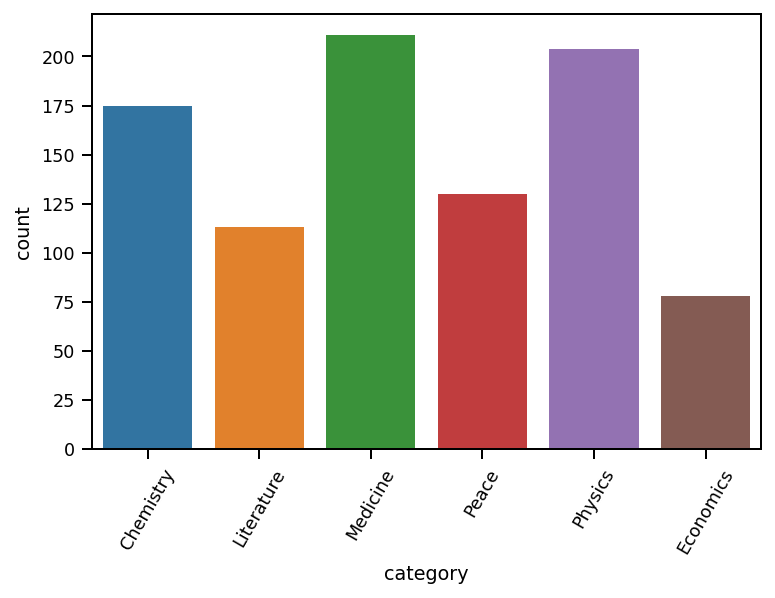

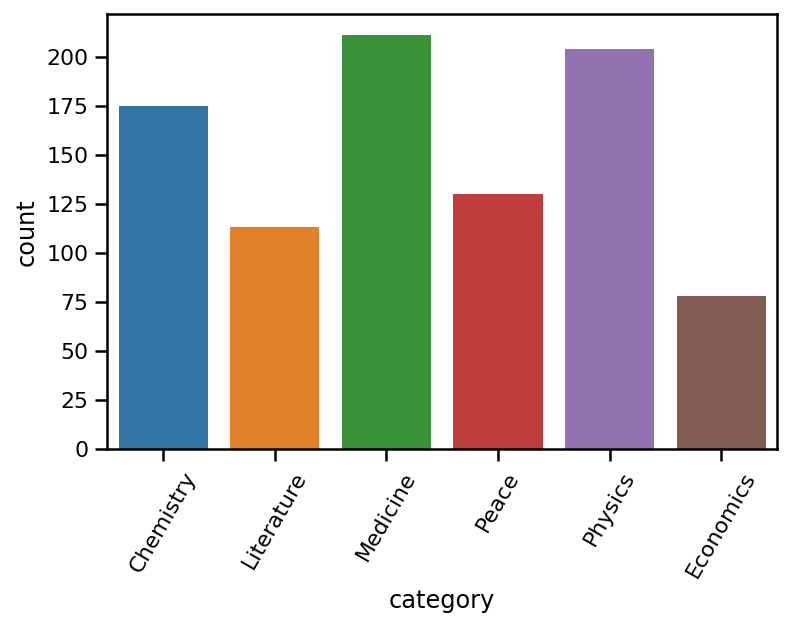

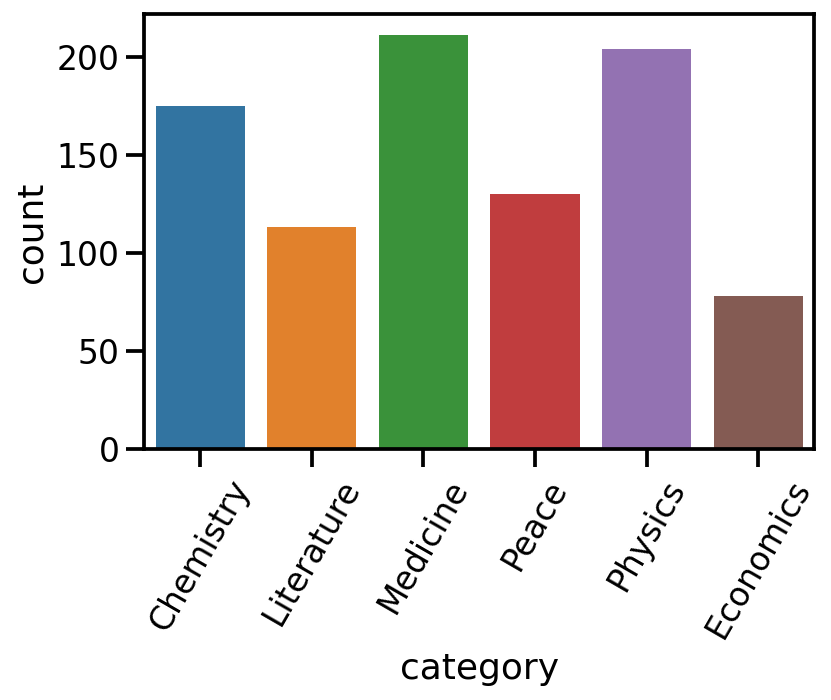

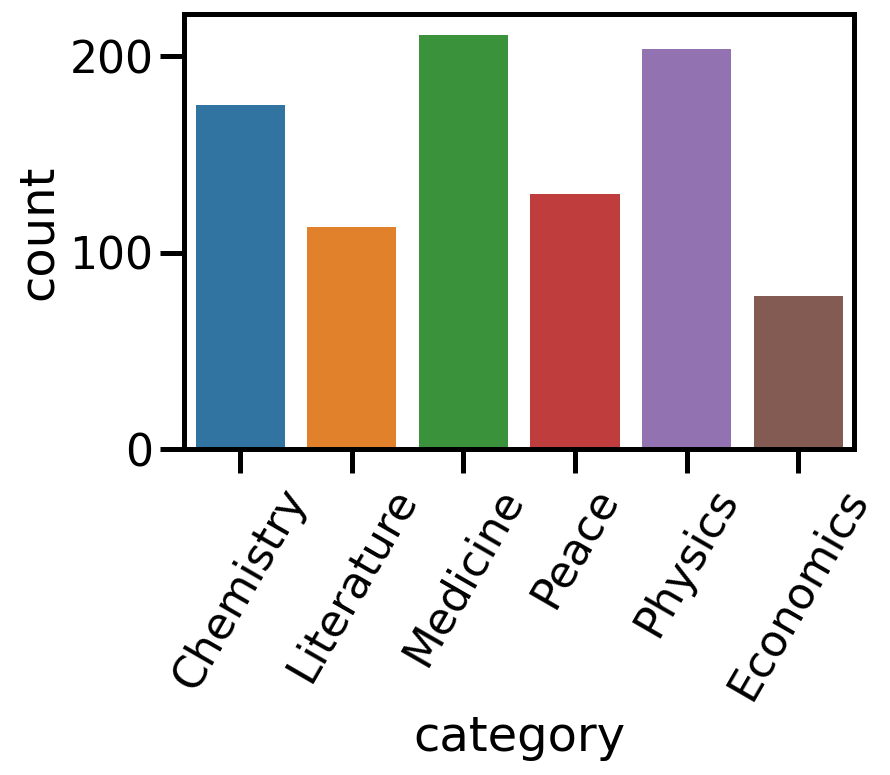

In [3]:
contexts = ['paper', 'notebook', 'talk', 'poster']


def example_context(context):
    with sns.plotting_context(context):
        sns.countplot(nobel['category'])
        plt.xticks(rotation=60)
        plt.show();


# Loop over contexts
for context in contexts:
    example_context(context);

For EDA, it is best to stick with `notebook`. However, if you are giving a presentation, or writing a blog post that involves plots, use `talk`. The context does not change the plot itself but scales up and down the tick marks. I used `with` context manager to temporarily set the context. There is also equivalent function `sns.set_context()` which cannot be used with _(uh-oh)_ `with`.

### Setting the style

There are several styles available in both Matplotlib and Seaborn. Matplotlib has much more and also includes Seaborn's styles. Changing the style will have impact on all the plots you have. Choosing one is mostly based on personal preferences, but sometimes you will have to choose depending on your plots. 

If there are many bar plots or line plots, it is best to choose a theme with a background grid. Grids make it easier to estimate the height of bars or the values of line plots:

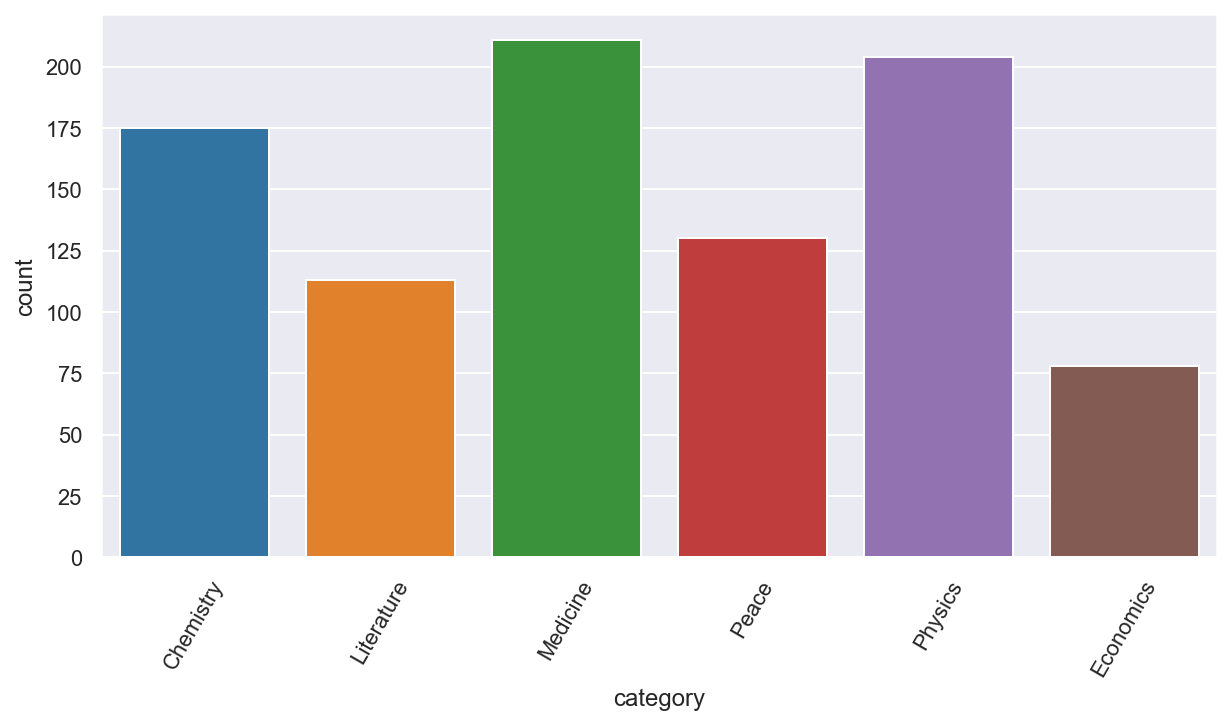

In [4]:
# Set the style
sns.set_context('notebook')
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(nobel['category'])
plt.xticks(rotation=60)
plt.show();

There is no need for grids if you are not working with bars or lines. You should choose either one of these styles: `white`, `dark`, `ticks`. I am only giving Seaborn styles in this article and they can be set using `sns.set_style()`. However, if you want to use Matplotlib styles, the list is available [here](https://matplotlib.org/3.3.1/gallery/style_sheets/style_sheets_reference.html). Let's see one example from Matplotlib:

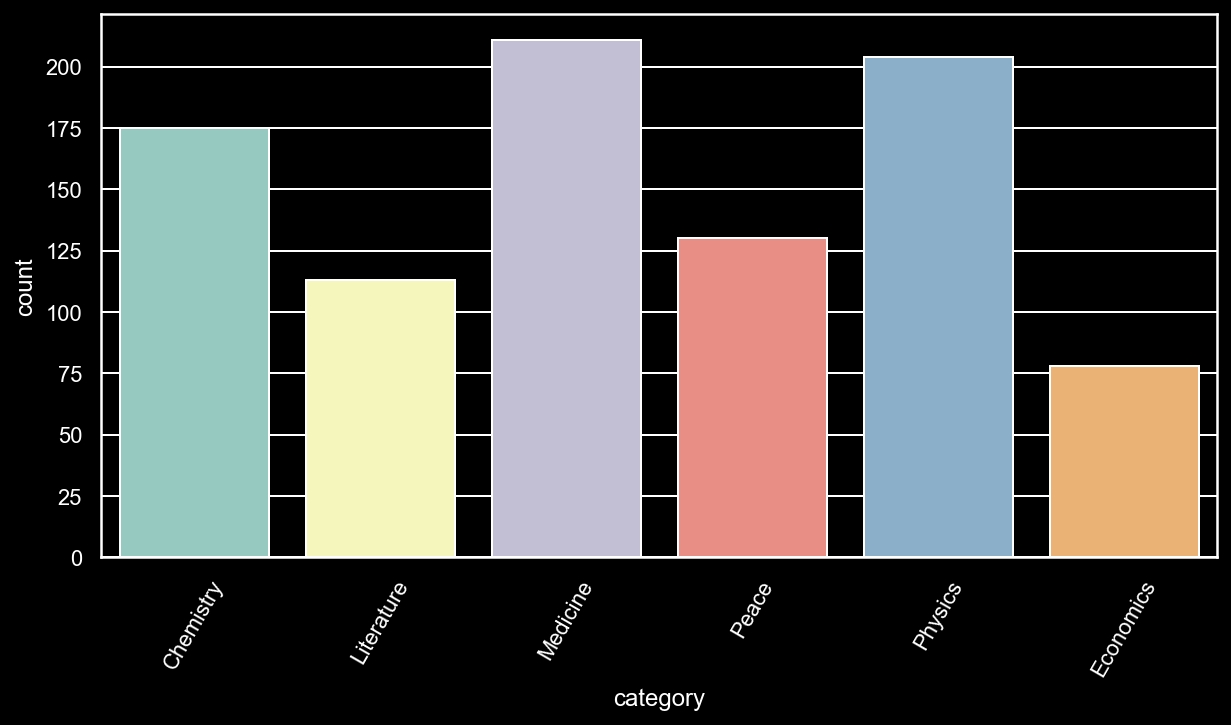

In [5]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(nobel['category'], ax=ax)
plt.xticks(rotation=60)
plt.show();

### Annotating text, deep guide

Regardless of how beautiful and informative your plots are, sometimes it can be very difficult to read them. So, instead of providing a description as a wall of text, you can use annotations together with arrows to point to important parts of the plot.
This section is about placing text in any part of the plot.

First, let's place a text to an empty figure:

In [6]:
sns.set_style('darkgrid')
sns.set_context('notebook')

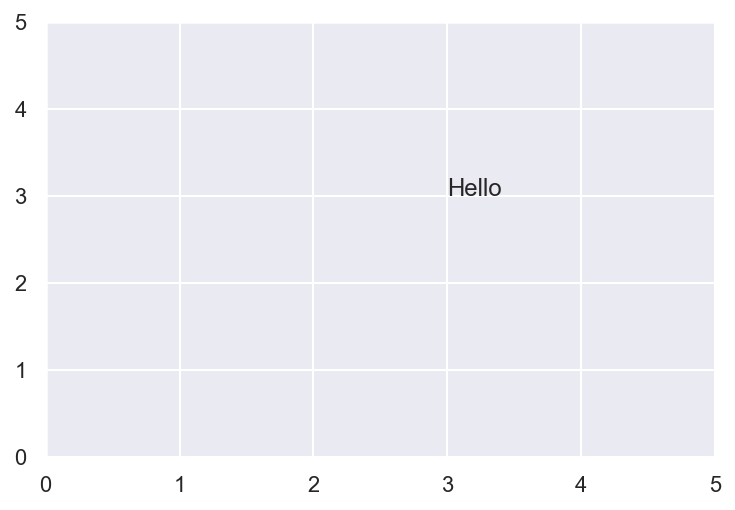

In [7]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello', xy=(3, 3), xycoords='data')
plt.show();

We create an empty subplot. Then, I set the axis limits to plot a larger figure. The first argument `annotate()` accepts is the text to be placed. The next and probably most important parameter is `xycoords`. It can accepts a range of values but the best is to set it to `data`. This means that we define the coordinates of the text based on our data. So, when I set `xy` parameter to (3, 3) it places them depending on the axis values. Let's add another text 1 point above the previous:

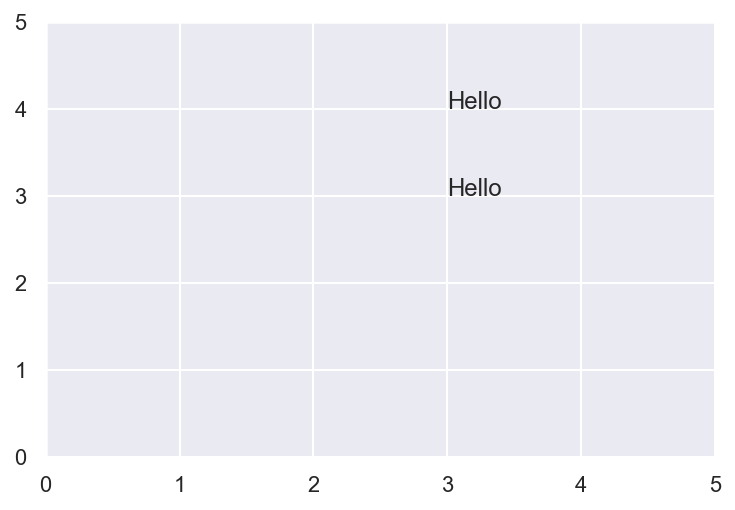

In [8]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello', xy=(3, 3), xycoords='data')
ax.annotate('Hello', xy=(3, 4), xycoords='data')
plt.show();

We adjusted the y value of `xy` to put a text 1 point above the previous. Note that since I set `xycoords` to `data`, the units are calculated to match the axis ticks. If we have dates on the `XAxis`, you would provide a date to `xy` to specify the `x` coordinate. 

Sometimes, the grid joints might not be the best place to put the text to. You might want to point to specific part of the plot but the text to appear from some other offset. For example, the above example places the text to (3, 3) coordinates. But what if we want to point to that same point but want the text appear a little above and a little to the left? Matplotlib provides two other parameters for these situations:

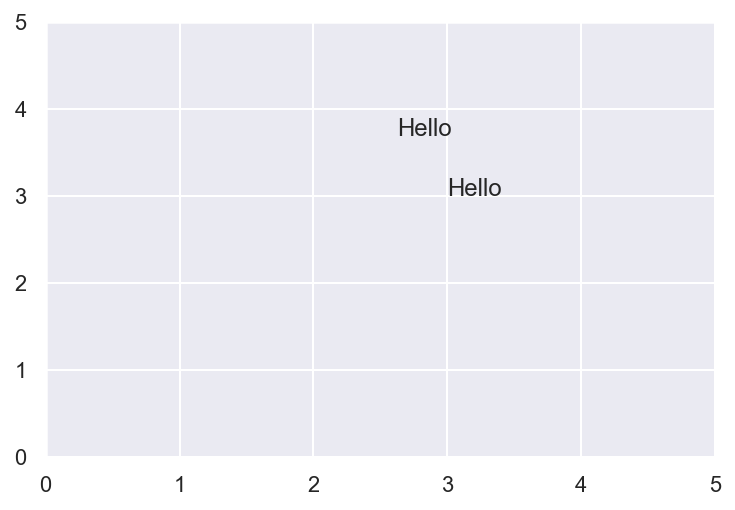

In [9]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello',
            xy=(3, 3),
            xycoords='data',
            xytext=(-25, 30),
            textcoords='offset points')
ax.annotate('Hello', xy=(3, 3), xycoords='data')
plt.show();

`textcoords` just like `xycoords` accepts different scaling units. If we set `textcoords` to `offset points`, matplotlib interprets the x and y values as how many units off `xy` we want to move the text. So interpreting the above code, we want to annotate the (3, 3) point but want the text to appear at 30 points above and 25 points to the left. This method is really flexible because it allows to control the location of the text in any way we want.

In [10]:
sns.set_style('white')
sns.set_context('notebook')

Now, let's get back to our example. We have a count plot but instead of leaving the audience guessing, we want to place the height of each bar on top of itself. This will greatly help the interpretation. Let's see the plot:

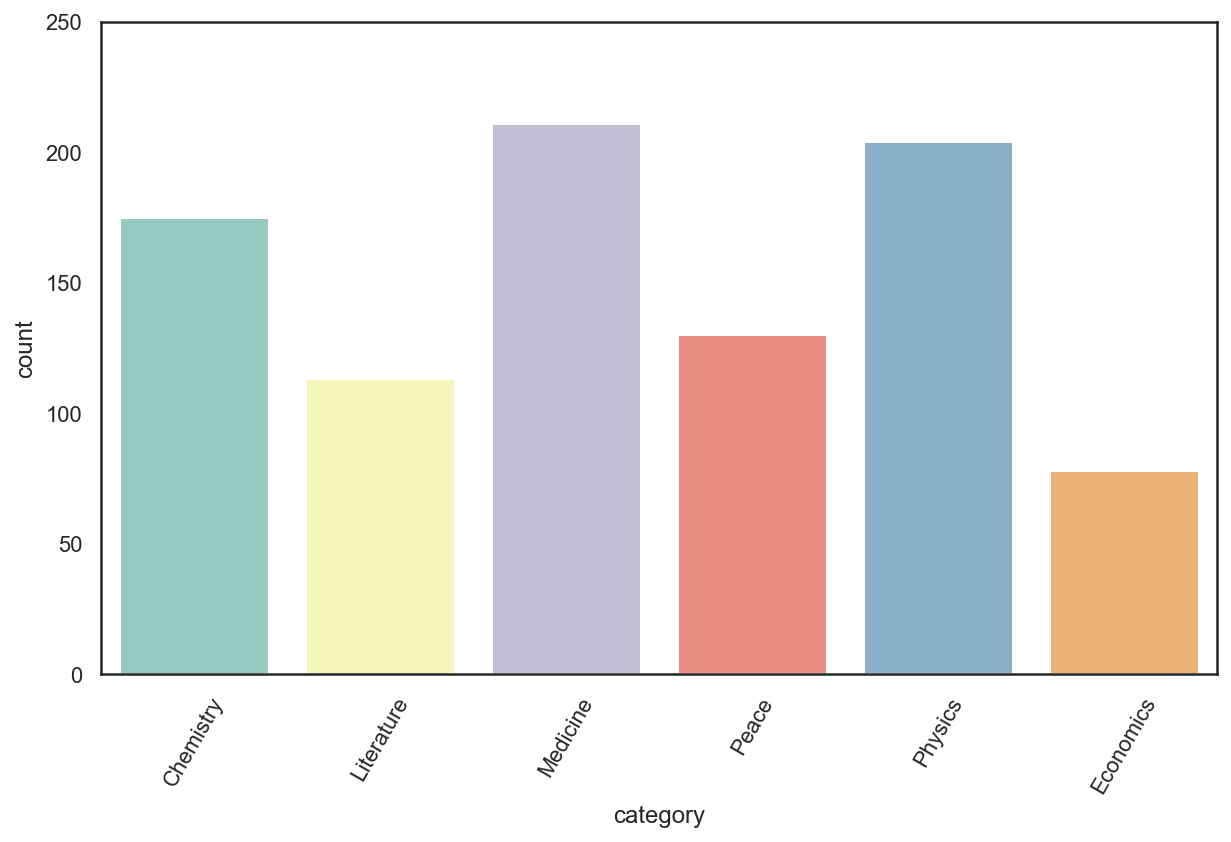

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plot = sns.countplot(nobel['category'], ax=ax)
ax.set(ylim=(0, 250))
plt.xticks(rotation=60)
plt.show(plot);

To put a text above each bar, we have to find out each of their heights. The reason I assigned the plot to a variable is because it provides some additional attributes about the plot:

In [12]:
print(plot)
print(type(plot))

AxesSubplot(0.125,0.125;0.775x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'>


Any plot with bars have a useful attribute we can use called `patches`:

In [13]:
# Print the number of patches
print(len(plot.patches))
# Print an example
print(plot.patches[0])
# Print the type
print(type(plot.patches[0]))

6
Rectangle(xy=(-0.4, 0), width=0.8, height=175, angle=0)
<class 'matplotlib.patches.Rectangle'>


As you see, there are 6 `Rectangle` objects just as there are 6 bars in the plot. We printed the first bar and from the output it can be seen that it has a height of 175. Now, let's loop over each `Rectangle` object and get their height and their `x` coordinate:

In [14]:
for patch in plot.patches:
    print(
        f"Height: {patch.get_height()}, x_coordinate: {patch.get_x()}, \
        width: {patch.get_width()}"
    )

Height: 175, x_coordinate: -0.4, width: 0.8
Height: 113, x_coordinate: 0.6, width: 0.8
Height: 211, x_coordinate: 1.6, width: 0.8
Height: 130, x_coordinate: 2.6, width: 0.8
Height: 204, x_coordinate: 3.6, width: 0.8
Height: 78, x_coordinate: 4.6, width: 0.8


To get the height or `y` value we use `.get_height()` function and to get the `x` value we use `.get_x()`. We should also get the width so that we know where the center of each bar is.

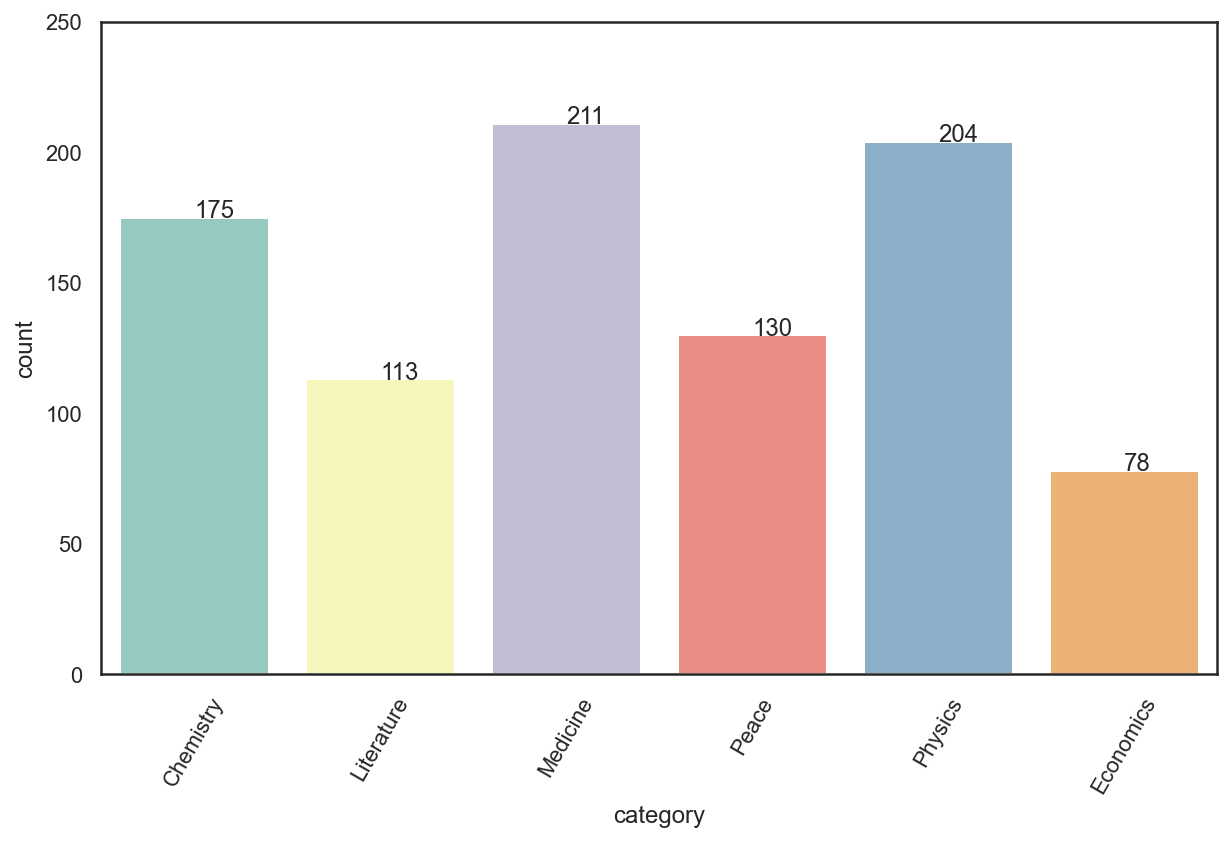

In [15]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Store the plot for further tasks
plot = sns.countplot(nobel['category'], ax=ax)
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250))
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()))

plt.xticks(rotation=60)
plt.show(plot)

OK, so we do have the texts but they are looking weird. We have to give them some breathing room and some formatting. We will use the offset text feature we talked earlier:

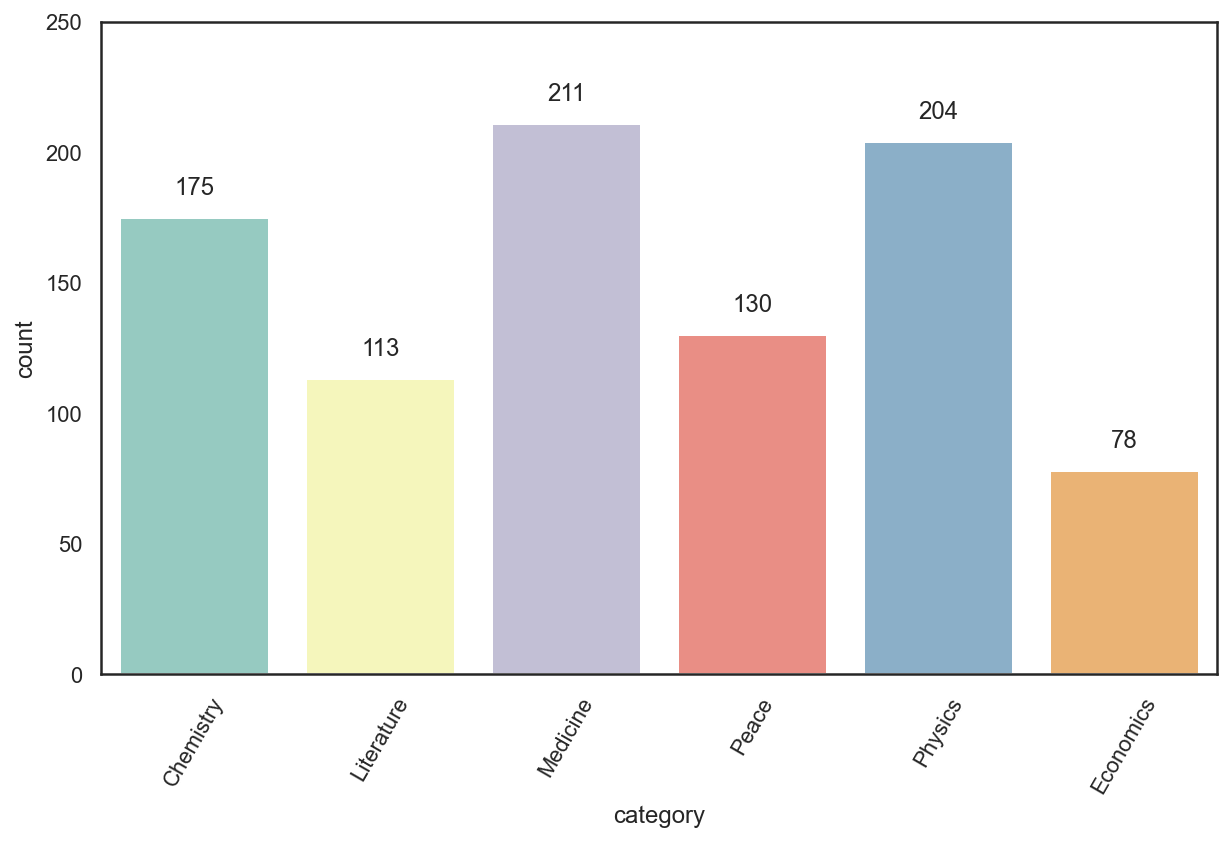

In [16]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Store the plot for further tasks
plot = sns.countplot(nobel['category'], ax=ax)
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250))
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                verticalalignment='center',
                horizontalalignment='center',
                xytext=(0, 15),
                textcoords='offset points')

plt.xticks(rotation=60)
plt.show(plot)

There you go, you have the height of each bar placed on top. It took some work to get to the right conditions so I suggest you to reread this section and practice it on your own. 

I am planning to write a separate article about annotating text since it is a big topic and needs some time to wrap your head around. I will probably talking about more advanced methods for placing text and also discuss more plot types, using arrows, etc. So, stay tuned folks.

### Removing spines or axes for more clarity (despining)

So, we are gradually improving our simple count plot. After we put the exact values of each bar, there is no need to keep the `YAxis`, since it does not give any information. Also, we also don't need the `Y` tick labels.

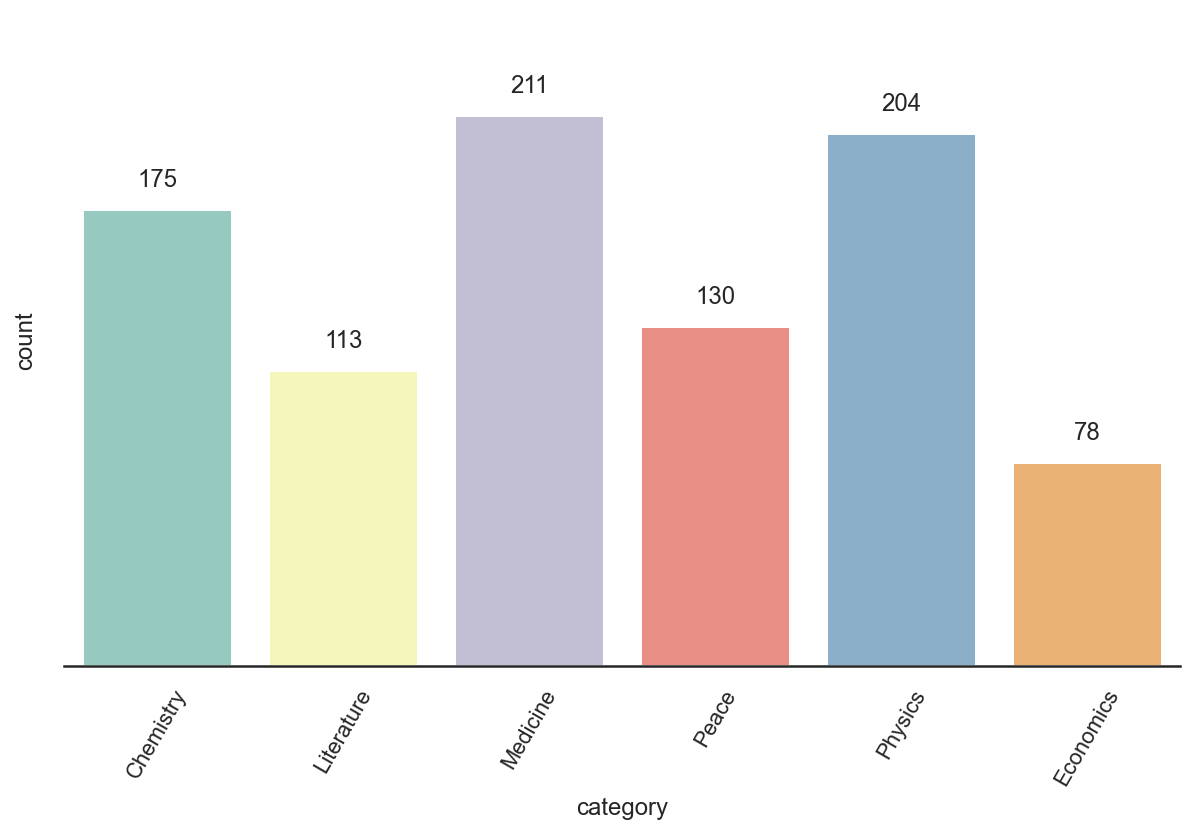

In [17]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Store the plot for further tasks
plot = sns.countplot(nobel['category'], ax=ax)
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250))
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                verticalalignment='center',
                horizontalalignment='center',
                xytext=(0, 15),
                textcoords='offset points')
# Remove the left axis
sns.despine(left=True, ax=ax)
# Remove the yticks
ax.set_yticklabels([])
plt.xticks(rotation=60)
plt.show(plot)

`despine()` function is available using Seaborn. To give it more flexibility, you have to specify the subplot to work on with `ax`. That's why I have been using `fig` and `ax` objects with Seaborn. Matplotlib and Seaborn are a force to reckon with together.

For the next sections, I will be improving upon our countplot. So, to avoid repetition I will wrap a function around the main part of the plot. Also, I am changing to a single color and I will explain why later:

In [18]:
def countplot():
    # Store the plot for further tasks
    plot = sns.countplot(nobel['category'], ax=ax, color='#f5a742')
    # Make room for annotations by increasing the height of the plot
    ax.set_ylim(0, 250)
    # Loop over rectangles
    for patch in plot.patches:
        # Place texts
        ax.annotate(text=patch.get_height(),
                    xy=(patch.get_x() + patch.get_width() / 2,
                        patch.get_height()),
                    verticalalignment='center',
                    horizontalalignment='center',
                    xytext=(0, 15),
                    textcoords='offset points')
    # Remove the left axis
    sns.despine(left=True, ax=ax)
    # Remove the yticks
    ax.set_yticklabels([])
    plt.xticks(rotation=60)

### Axis labels and title

Now, let's finally talk about axis labels and titles. They are fairly simple and I am sure most people are already familiar with the methods I will be talking about. First, I will be showing how to change the font size and colors of labels and title.

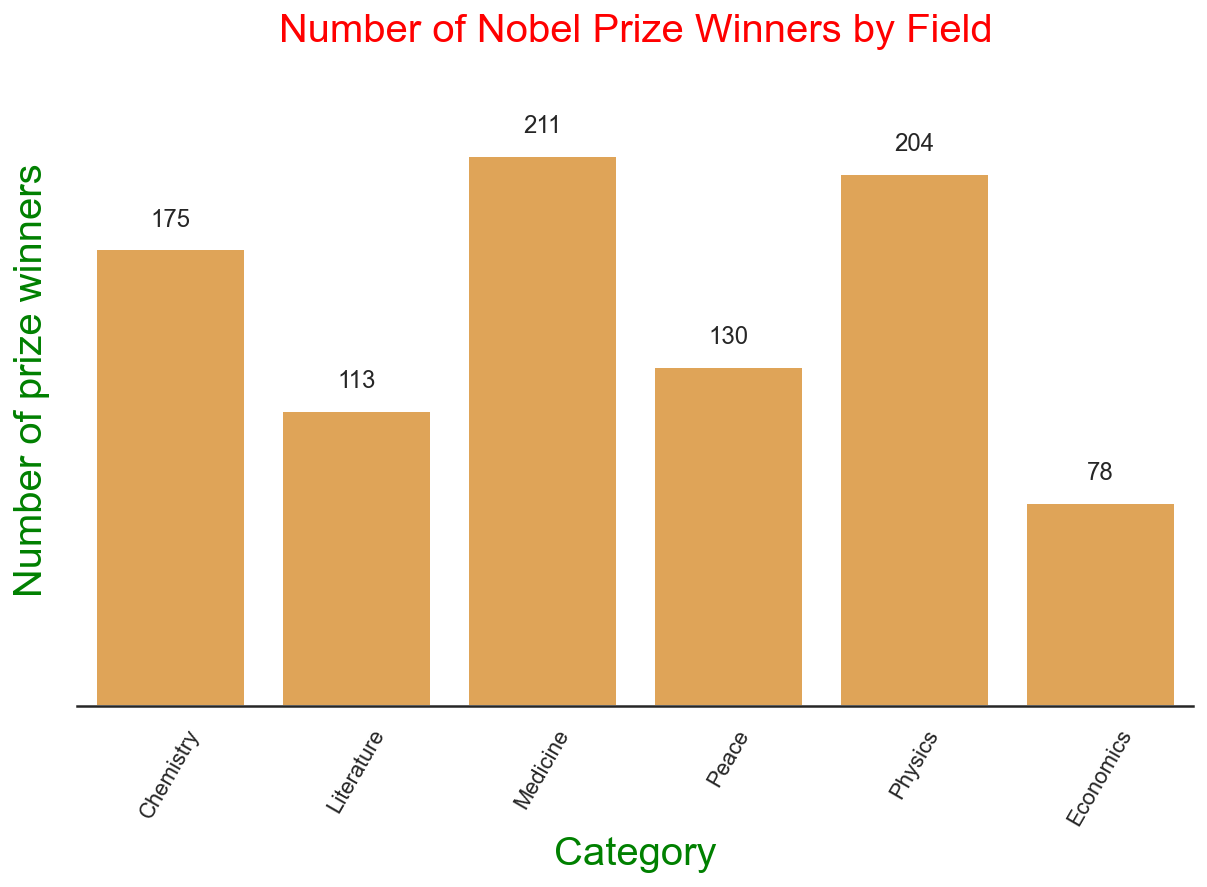

In [19]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
countplot()
# Change the font for x
ax.set_xlabel('Category', fontsize=20, color='g')
# Change the font for y
ax.set_ylabel('Number of prize winners', fontsize=20, color='g')
# Set a title
ax.set_title('Number of Nobel Prize Winners by Field', fontsize=20, color='r')
plt.show()

For our plot, default black is fine but I just wanted to show an example. Actually, an informative title would be enough for this plot. We don't need the axis labels. I will remove them and switch back to black:

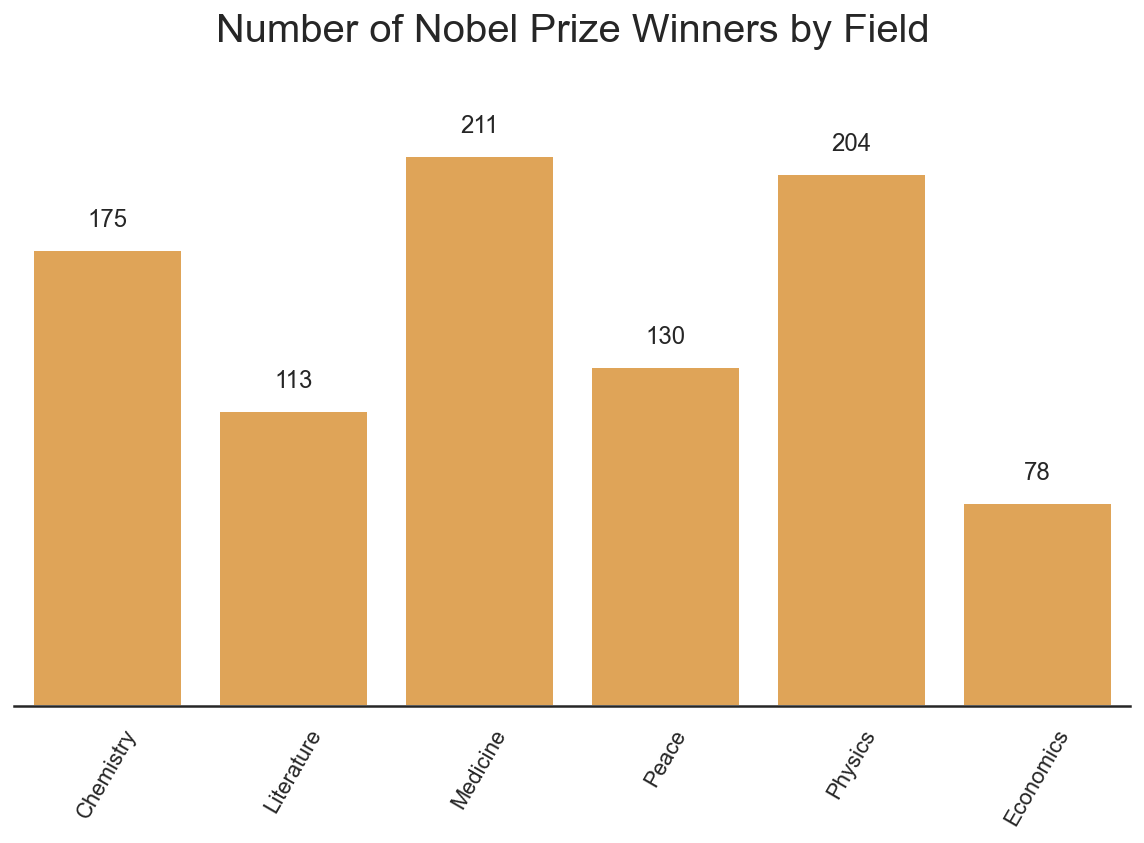

In [20]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Main plot
countplot()
# Empty axis labels
ax.set(xlabel='', ylabel='')
# Set a title
ax.set_title('Number of Nobel Prize Winners by Field', fontsize=20)
plt.show()

### Colors and Palettes

When it comes to color, there are a number of things to consider. First one is the data type. There are different palettes to choose depending on your data:
1. Circular palettes: these are best if you have a data that has no ordering. 
2. Sequential palettes: use these if your data has a consistent range from low to high or vice versa.
3. Diverging palettes: are best used when both high and low points of the data is interesting.

Also, try to avoid colors as much as possible when color does not add any new information. For our countplot example, the color does not encode any new data. That's why I used a single color for all bars. 

Now, let's see another example to use a sequential pallete. I will use the preloaded diamonds dataset as a sample:

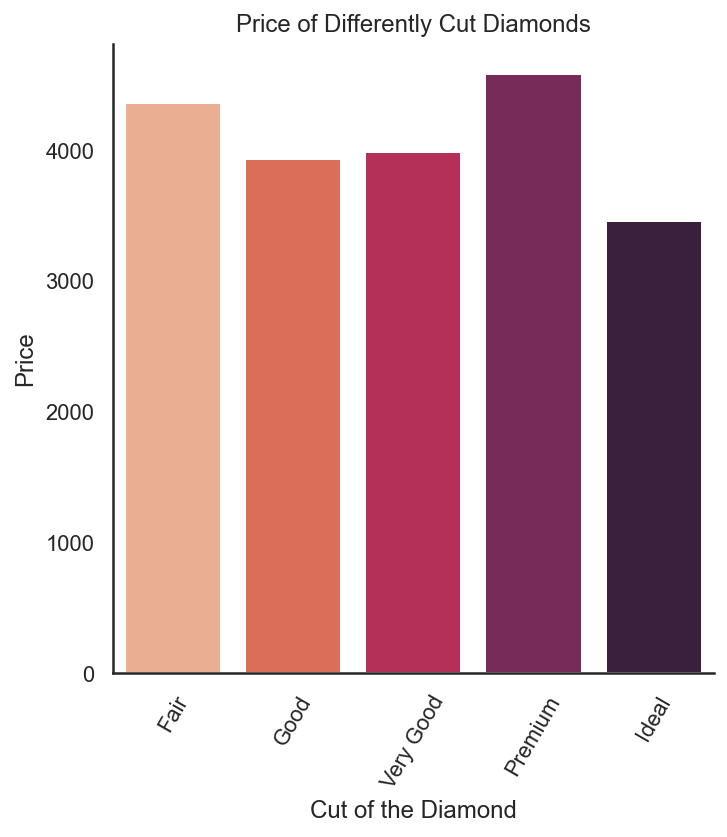

In [21]:
# Use preloaded dataset
diamonds = sns.load_dataset('diamonds')
# Define the order of qualities
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# Plot a bar chart
sns.catplot(x='cut',
            y='price',
            data=diamonds,
            kind='bar',
            ci=False,
            palette='rocket_r',
            order=cut_order)
# Some styling
plt.xticks(rotation=60)
plt.xlabel('Cut of the Diamond')
plt.ylabel('Price')
plt.title('Price of Differently Cut Diamonds')

Here, the bars have a particular ordering. That's why it is good to use a sequential palette. Let's see another example:

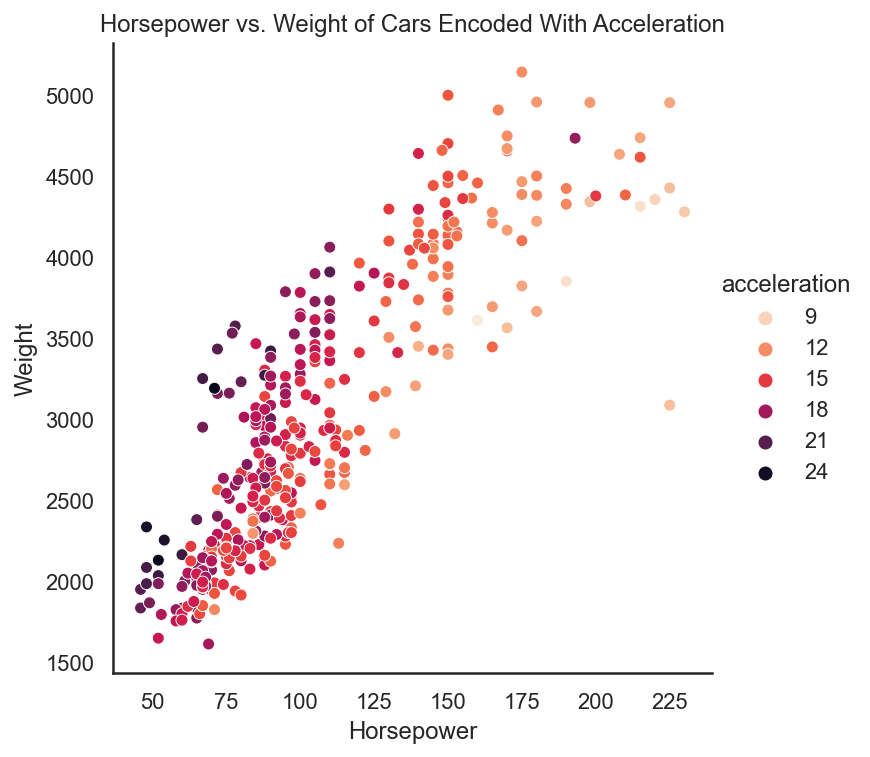

In [22]:
cars = sns.load_dataset('mpg')
sns.relplot(x='horsepower',
            y='weight',
            data=cars,
            hue='acceleration',
            palette='rocket_r')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Horsepower vs. Weight of Cars Encoded With Acceleration')

As you can see, choosing a right palette can be pretty important. Here are the available palettes:

Text(0.5, 1.0, 'deep')

Text(0.5, 1.0, 'deep6')

Text(0.5, 1.0, 'muted')

Text(0.5, 1.0, 'muted6')

Text(0.5, 1.0, 'pastel')

Text(0.5, 1.0, 'pastel6')

Text(0.5, 1.0, 'bright')

Text(0.5, 1.0, 'bright6')

Text(0.5, 1.0, 'dark')

Text(0.5, 1.0, 'dark6')

Text(0.5, 1.0, 'colorblind')

Text(0.5, 1.0, 'colorblind6')

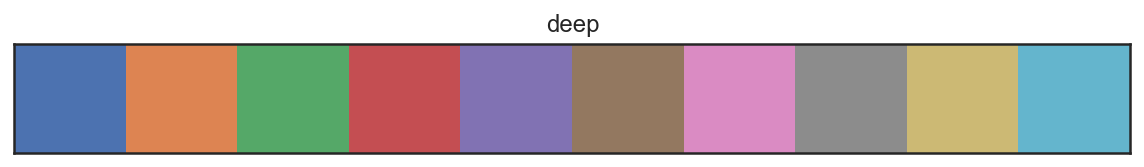

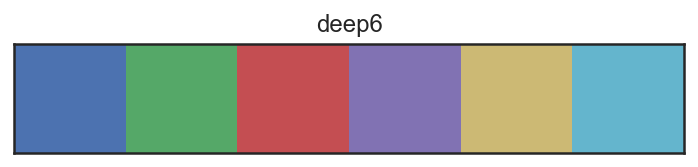

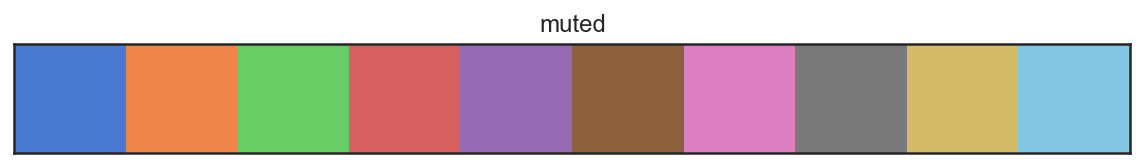

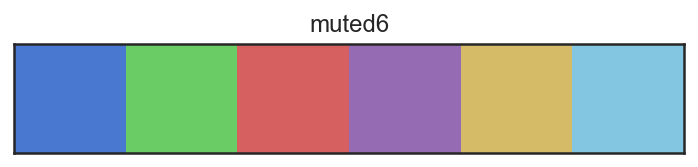

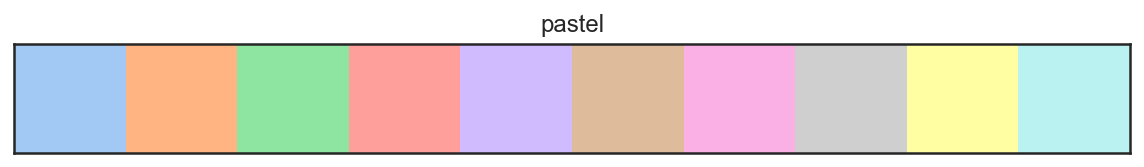

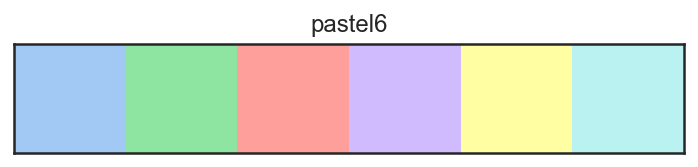

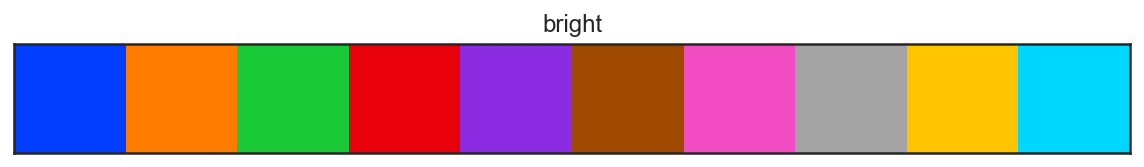

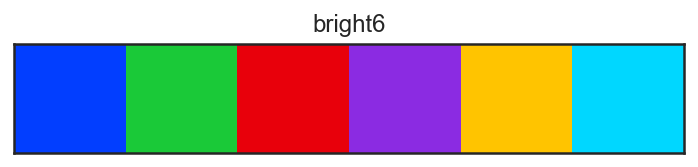

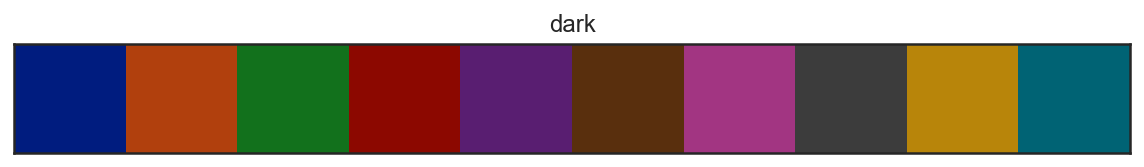

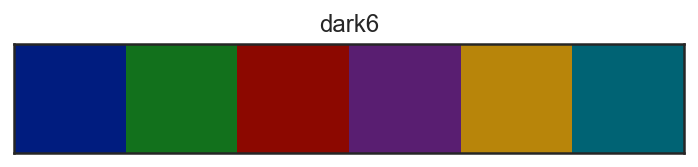

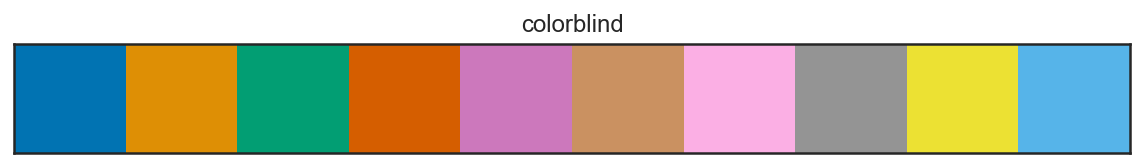

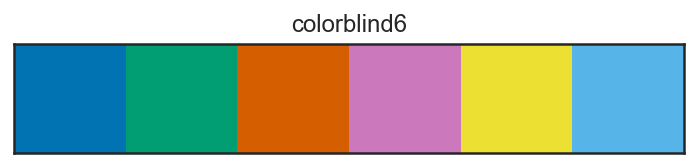

In [23]:
for key, palette in sns.palettes.SEABORN_PALETTES.items():
    sns.set_palette(palette)
    sns.palplot(sns.color_palette())
    plt.title(key)

`palplot()` creates these nice looking palette plots while `color_palette()` gives the current plot. I suggest you to read [this](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/) article for more info on palettes and colors.

### Choosing the right plot for the task

Choosing a correct plot for different audiences is essential. I am not talking about choosing the right plot for the data. Rather, choosing one which depicts the insight in your data in as easy manner as possible.

General rule of thumb for __single subplots__: Make sure that a single plot does not contain more than 4 variables. Instead of adding new info, it introduces a new layer of difficulty. Ideal is two or three. If you need more, try displaying your results in two or more individual plots. 

__Plot Type__: go for plots which are easy to read such as bar plots, line plots or scatter plots. Complex plots, even though they give a deep insight into data, are not easily interpreted and understood by many. In the __EXPLORATORY__ data analysis, try to use everything in your toolbox to best understand your data. In __EXPLANATORY__ stage, summarize the main points using simple plots. Don't include plots like KDE (Kernel Density Estimate), violin plot, box plot, swarm, etc. unless you want your audience to bleed from the eyes (or ears, if you are giving a talk).

__Multiple Subplots__: Try to avoid them as much as possible. If there are multiple plots on a single figure, they become hard to read because the scale will be smaller. While doing your analysis, use Faceting or Small Multiples to understand your data first. Then, choose the most important subplot(s) in your FacetGrid or grid of subplots and display them individually. This one needs an example:

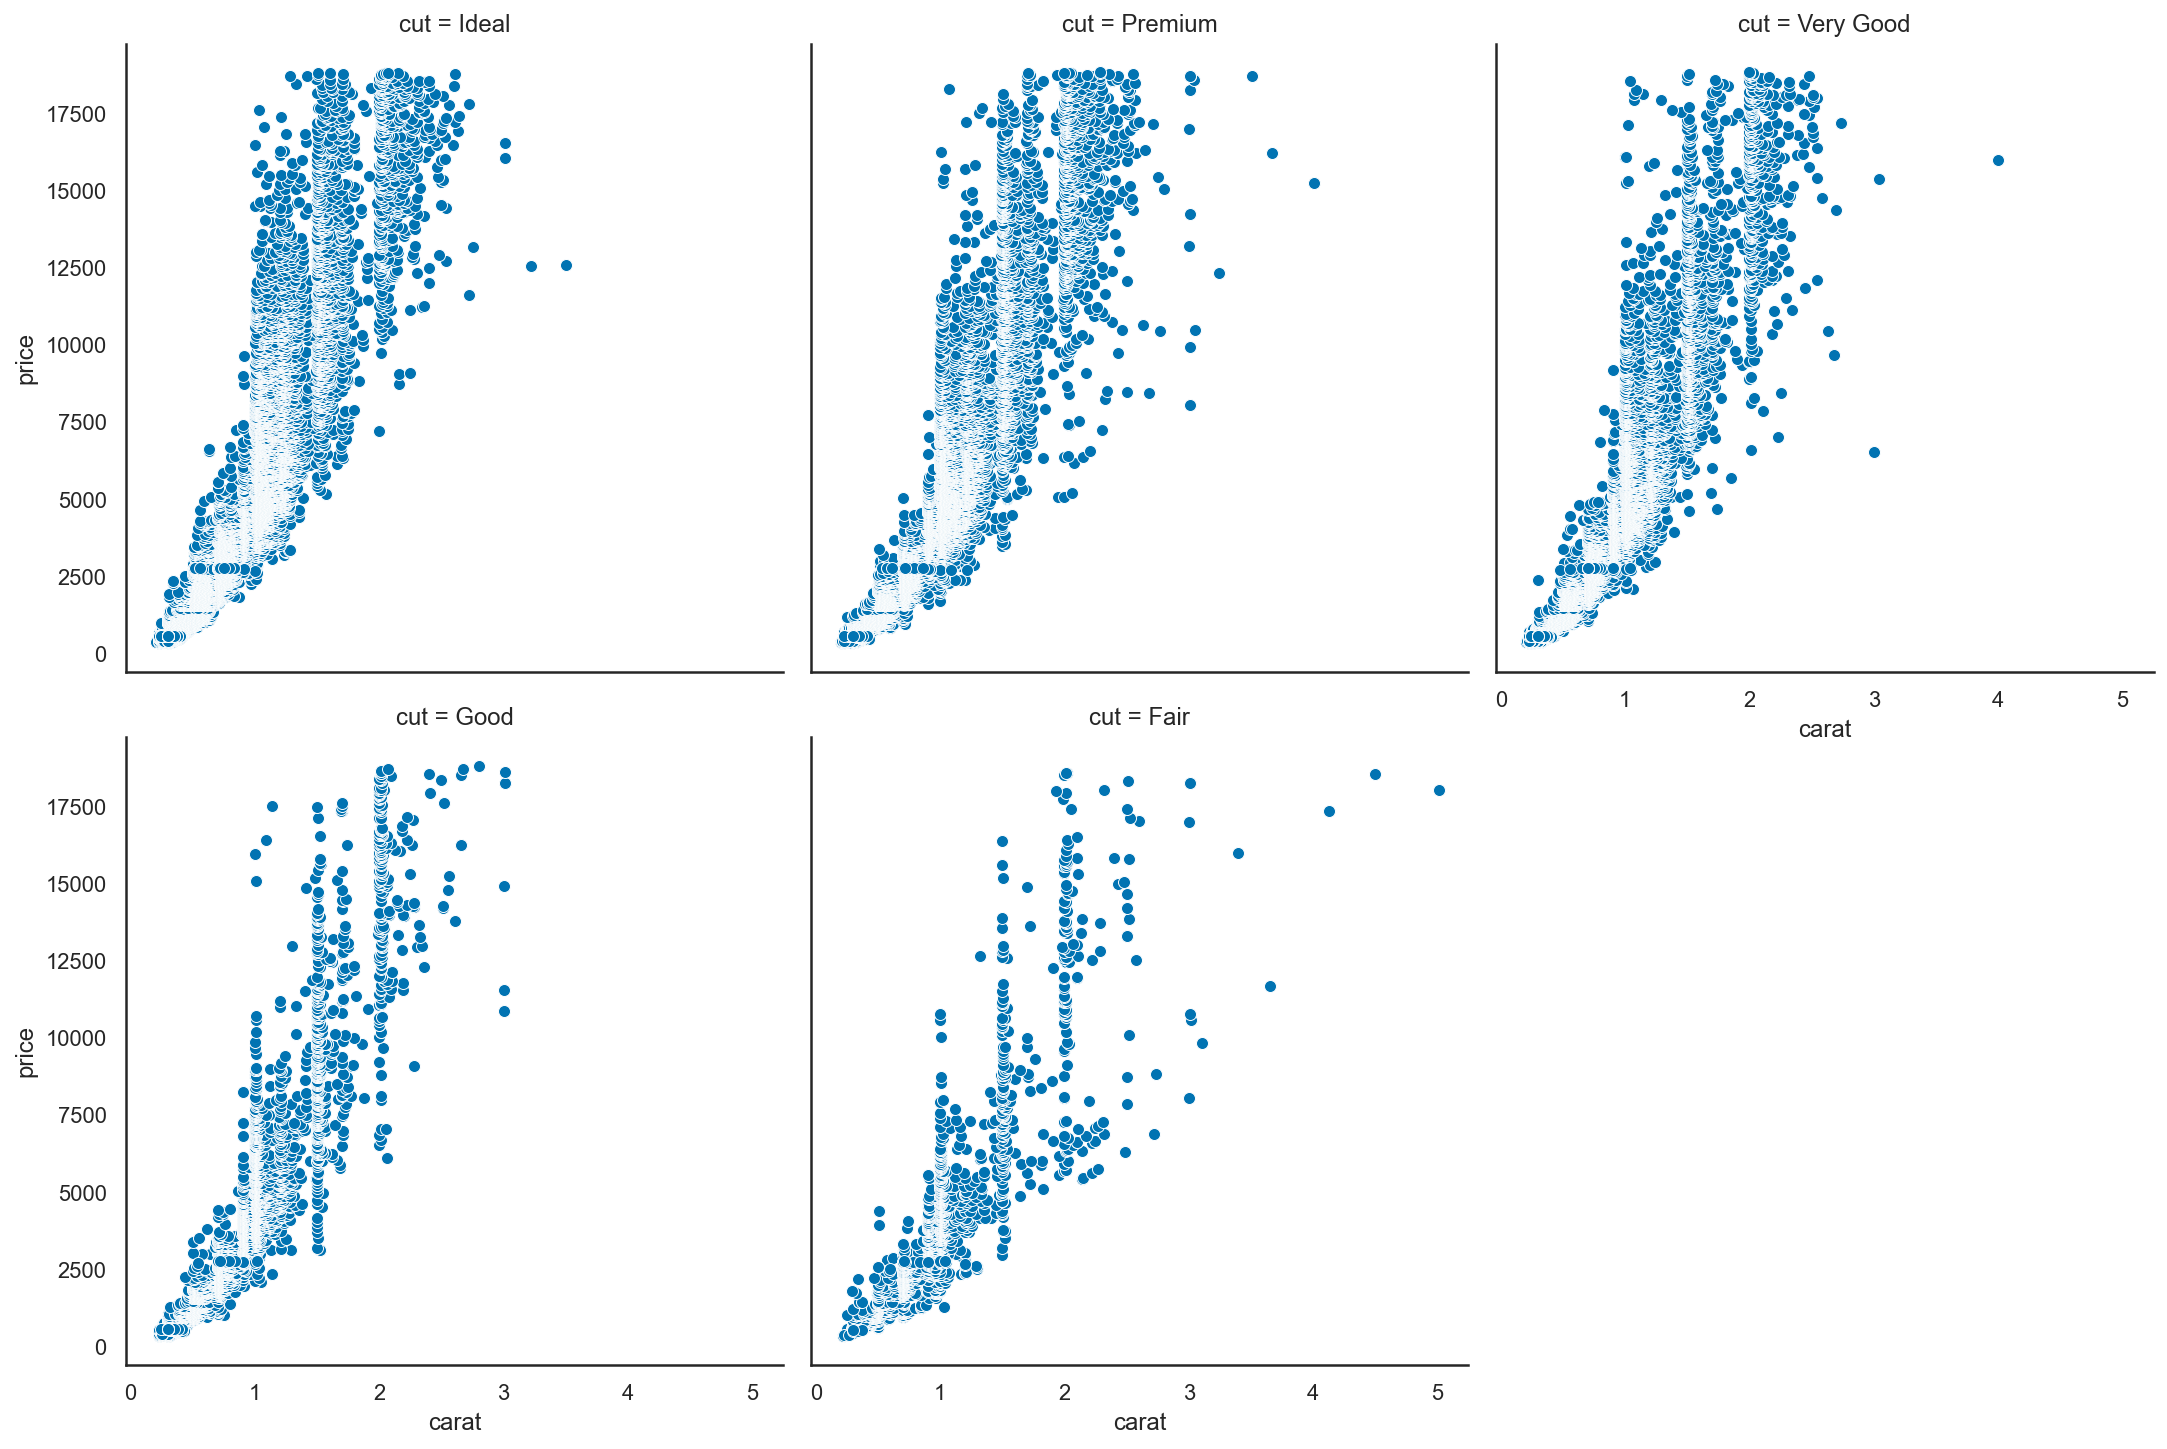

In [24]:
sns.relplot(x='carat', y='price', data=diamonds, col='cut', col_wrap=3)

This FacetGrid compares price vs. carat of each type of diamond cut. For an average person this is a lot to take in and they probably don't look at every single of them. What might be interesting for them, for instance, is how ideal diamonds change in price. So, you take the first subplot and display it individually without showing the entire FacetGrid. You might need to work on this a little:

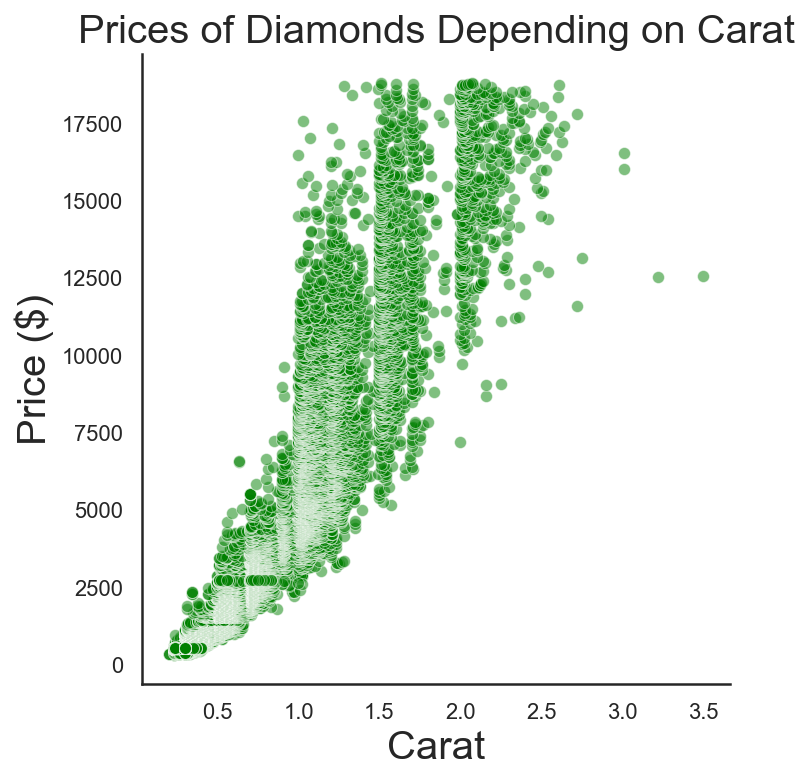

In [25]:
# Extract ideal diamonds
ideal = diamonds.query('cut == "Ideal"')
# Plot the data
sns.relplot(x='carat',
            y='price',
            data=ideal,
            kind='scatter',
            alpha=0.5,
            color='g')
plt.title('Prices of Diamonds Depending on Carat', fontsize=20)
plt.xlabel('Carat', fontsize=20)
plt.ylabel('Price ($)', fontsize=20)

This method is much better. You can quickly mention what's going on in other plots while focusing on the most important parts.

### Wrapping Up

Whew, this was a lot. I threw a lot of information at you. But it is for the best. After reading the article, you are now ready to turn any plot into a masterpiece. Use the methods discussed in here for Explanatory Data Analysis or Data Story-telling. If you want to set yourself apart from thousand others, you can use them in Exploratory Data Analysis too. Go and impress some people!